In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r"C:\Users\asdf\Documents\D.S\KAGGLE\prediction_of_blueberry_yield\data\train.csv")
test_data=pd.read_csv(r"C:\Users\asdf\Documents\D.S\KAGGLE\prediction_of_blueberry_yield\data\test.csv")

In [3]:
train_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
test_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [5]:
train_data["diff"]="train"
test_data["diff"]="test"

In [6]:
print(train_data.shape,test_data.shape)

(15289, 19) (10194, 18)


In [7]:
data=pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [8]:
data.shape

(25483, 19)

In [9]:
data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,diff
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146,train
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201,train
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760,train
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590,train
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417,train


In [10]:
data=data.drop_duplicates()
data.shape

(25483, 19)

In [11]:
data.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,25483.000000,15289.000000
mean,12741.000000,19.741200,0.390231,0.286584,0.492136,0.592702,82.184739,49.682851,68.668881,59.240309,28.666244,48.578158,18.599458,0.323506,0.502368,0.446470,36.153509,6025.193999
std,7356.452791,6.593895,0.373249,0.059896,0.148134,0.139650,9.149237,5.548662,7.644002,6.613090,3.196478,5.392551,11.706748,0.164480,0.074517,0.037042,4.026555,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,6370.500000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,12741.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.040452,6117.475900
75%,19111.500000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559628,0.473089,39.139916,7019.694380
max,25482.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25483 entries, 0 to 25482
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25483 non-null  int64  
 1   clonesize             25483 non-null  float64
 2   honeybee              25483 non-null  float64
 3   bumbles               25483 non-null  float64
 4   andrena               25483 non-null  float64
 5   osmia                 25483 non-null  float64
 6   MaxOfUpperTRange      25483 non-null  float64
 7   MinOfUpperTRange      25483 non-null  float64
 8   AverageOfUpperTRange  25483 non-null  float64
 9   MaxOfLowerTRange      25483 non-null  float64
 10  MinOfLowerTRange      25483 non-null  float64
 11  AverageOfLowerTRange  25483 non-null  float64
 12  RainingDays           25483 non-null  float64
 13  AverageRainingDays    25483 non-null  float64
 14  fruitset              25483 non-null  float64
 15  fruitmass          

In [13]:
data.isnull().sum()

id                          0
clonesize                   0
honeybee                    0
bumbles                     0
andrena                     0
osmia                       0
MaxOfUpperTRange            0
MinOfUpperTRange            0
AverageOfUpperTRange        0
MaxOfLowerTRange            0
MinOfLowerTRange            0
AverageOfLowerTRange        0
RainingDays                 0
AverageRainingDays          0
fruitset                    0
fruitmass                   0
seeds                       0
yield                   10194
diff                        0
dtype: int64

## EDA

<Axes: >

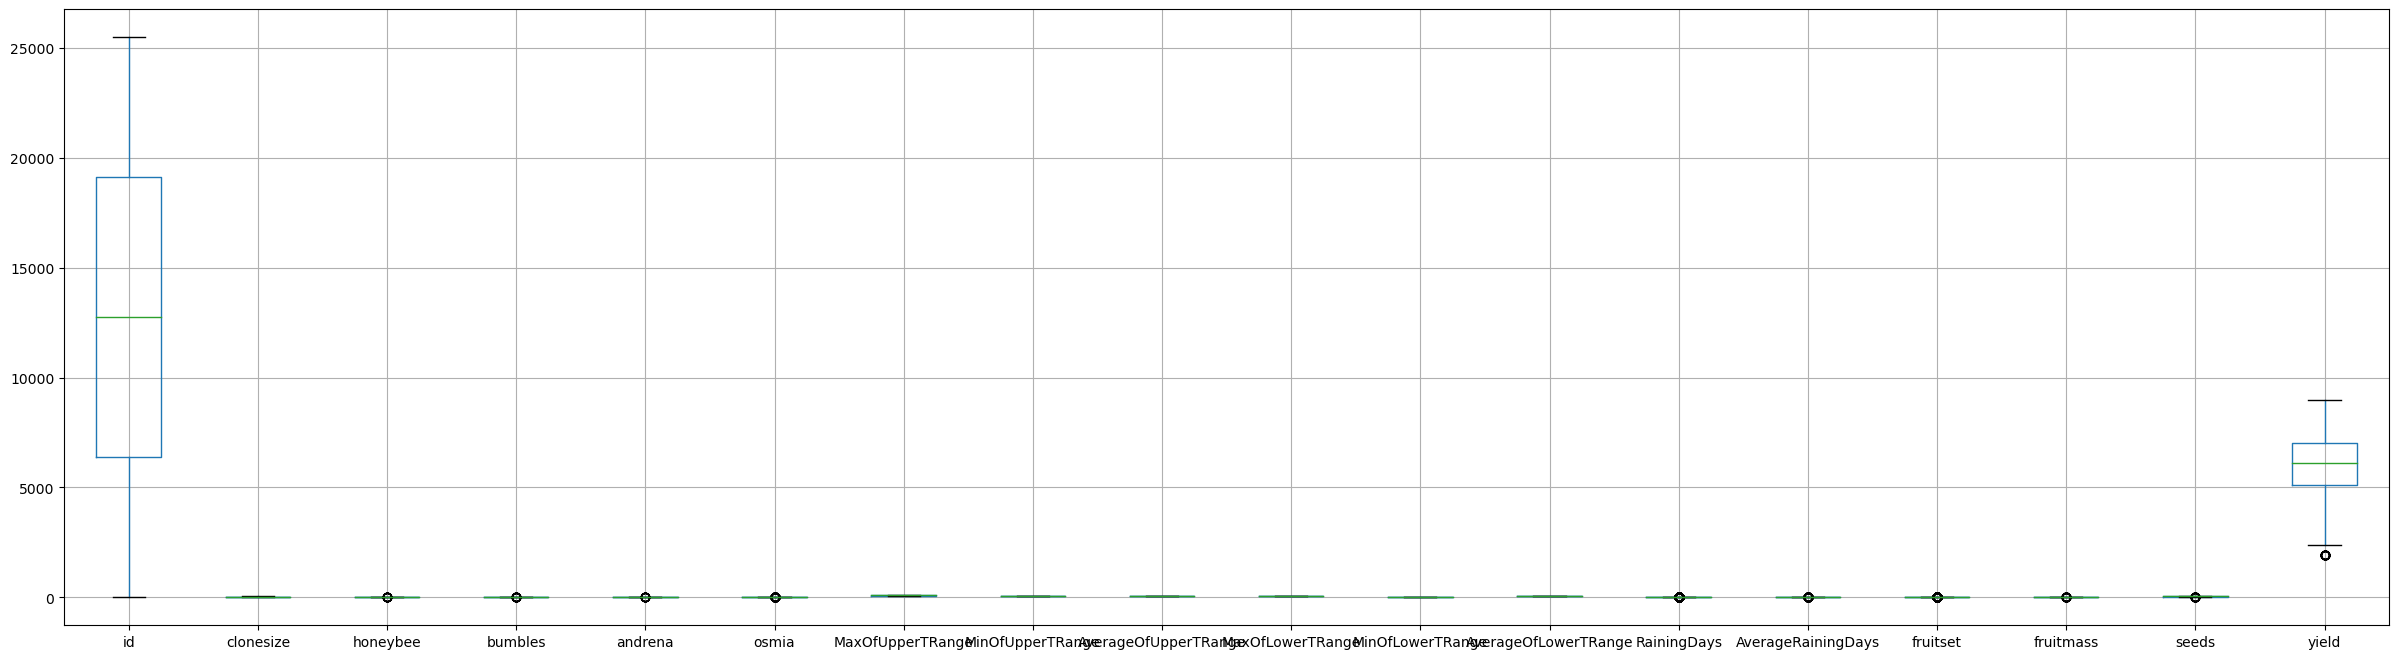

In [16]:
plt.figure(figsize=(30,8))
data.boxplot()

In [20]:
col=data.columns
print(len(col))
col

19


Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'diff'],
      dtype='object')

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(data.columns)):
    plt.subplot(10,2,i+1)
    if i>19:
        break
    else:
        plt.hist(data[col[i]])